In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [2]:
# Library
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# read img, prepare data
paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
inde = np.array([plt.imread(paths[i]) for i in range(len(paths))])
de = np.array([paths[i].split('/')[2] for i in range(len(paths))])
print(inde.shape, de.shape)

(18724, 28, 28) (18724,)


In [3]:
de[0:5]

array(['B', 'C', 'J', 'H', 'C'], dtype='<U1')

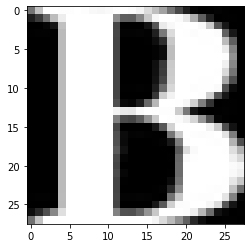

In [4]:
plt.imshow(inde[0], cmap='gray')

In [5]:
# reshape data, one-hot-encoding
inde = inde.reshape(18724, 28, 28, 1)
de = pd.get_dummies(de)
print(inde.shape, de.shape)

(18724, 28, 28, 1) (18724, 10)


In [6]:
# make model (use LeNet Model)
import tensorflow as tf

X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same')(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [7]:
model.fit(inde, de, epochs=10)

Epoch 1/10
586/586 [==============================] - 5s 4ms/step - loss: 0.5823 - accuracy: 0.8292
Epoch 2/10
586/586 [==============================] - 2s 4ms/step - loss: 0.2117 - accuracy: 0.9356
Epoch 3/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1681 - accuracy: 0.9479
Epoch 4/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1344 - accuracy: 0.9576
Epoch 5/10
586/586 [==============================] - 2s 4ms/step - loss: 0.1116 - accuracy: 0.9648
Epoch 6/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0840 - accuracy: 0.9725
Epoch 7/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0716 - accuracy: 0.9776
Epoch 8/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0606 - accuracy: 0.9814
Epoch 9/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0502 - accuracy: 0.9838
Epoch 10/10
586/586 [==============================] - 2s 4ms/step - loss: 0.0404 - accuracy: 0.9870

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64    